This is the introduction of Pandas which is built on top of numpy

In [89]:
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import urllib
import zipfile
%matplotlib inline

nobels = pd.read_csv("nobels.csv", names=["year", "discipline", 'nobelist'])
nobels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        950 non-null    int64 
 1   discipline  950 non-null    object
 2   nobelist    950 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.4+ KB


In [90]:
nobels.head(10)
#nobels.tail(10)

,year,discipline,nobelist
0,1901,Chemistry,Jacobus Henricus van 't Hoff
1,1901,Literature,Sully Prudhomme
2,1901,Medicine,Emil Adolf von Behring
3,1901,Peace,Frédéric Passy
4,1901,Peace,Henry Dunant
5,1901,Physics,Wilhelm Röntgen
6,1902,Chemistry,Hermann Emil Fischer
7,1902,Literature,Theodor Mommsen
8,1902,Medicine,Ronald Ross
9,1902,Peace,Charles Albert Gobat


In [91]:
nobels.discipline.values[:50]

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Peace', 'Physics',
       'Chemistry', 'Literature', 'Medicine', 'Peace', 'Peace', 'Physics',
       'Physics', 'Chemistry', 'Literature', 'Medicine', 'Peace',
       'Physics', 'Physics', 'Physics', 'Chemistry', 'Literature',
       'Literature', 'Medicine', 'Peace', 'Physics', 'Chemistry',
       'Literature', 'Medicine', 'Peace', 'Physics', 'Chemistry',
       'Literature', 'Medicine', 'Medicine', 'Peace', 'Physics',
       'Chemistry', 'Literature', 'Medicine', 'Peace', 'Peace', 'Physics',
       'Chemistry', 'Literature', 'Medicine', 'Medicine', 'Peace',
       'Peace', 'Physics'], dtype=object)

In [92]:
nobels[nobels.discipline == 'Physics']

,year,discipline,nobelist
5,1901,Physics,Wilhelm Röntgen
11,1902,Physics,Hendrik Lorentz
12,1902,Physics,Pieter Zeeman
17,1903,Physics,Henri Becquerel
18,1903,Physics,Marie Curie
...,...,...,...
934,2018,Physics,Donna Strickland
935,2018,Physics,Gérard Mourou
947,2019,Physics,Didier Queloz
948,2019,Physics,James Peebles


In [93]:
nobels.nobelist.value_counts()

International Committee of the Red Cross         3
United Nations High Commissioner for Refugees    2
Linus Pauling                                    2
Marie Curie                                      2
John Bardeen                                     2
                                                ..
Kurt Wüthrich                                    1
Auguste Marie François Beernaert                 1
Stanford Moore                                   1
Jacques Monod                                    1
Severo Ochoa                                     1
Name: nobelist, Length: 943, dtype: int64

In [94]:
len(nobels.nobelist.unique())

943

In [95]:
nobels[nobels.nobelist.str.contains('Curie')]

,year,discipline,nobelist
18,1903,Physics,Marie Curie
19,1903,Physics,Pierre Curie
62,1911,Chemistry,Marie Curie
178,1935,Chemistry,Frédéric Joliot-Curie
179,1935,Chemistry,Irène Joliot-Curie


Generating pandas dataframe from numpy array

In [96]:
disco = np.load('discography.npy')
disco_df = pd.DataFrame(disco)
disco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    12 non-null     object        
 1   release  12 non-null     datetime64[ns]
 2   toprank  12 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 416.0+ bytes


Indexing in pandas dataframes

In [97]:
pd.options.display.max_rows = 16
nobels.index

RangeIndex(start=0, stop=950, step=1)

In [98]:
nobels_by_year = nobels.set_index('year')
nobels_by_year

,discipline,nobelist
year,,
1901,Chemistry,Jacobus Henricus van 't Hoff
1901,Literature,Sully Prudhomme
1901,Medicine,Emil Adolf von Behring
1901,Peace,Frédéric Passy
1901,Peace,Henry Dunant
...,...,...
2019,Medicine,William Kaelin Jr.
2019,Peace,Abiy Ahmed
2019,Physics,Didier Queloz


In [99]:
nobels_by_year.index

Int64Index([1901, 1901, 1901, 1901, 1901, 1901, 1902, 1902, 1902, 1902,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='year', length=950)

In [100]:
nobels_by_year.loc[1901]

,discipline,nobelist
year,,
1901,Chemistry,Jacobus Henricus van 't Hoff
1901,Literature,Sully Prudhomme
1901,Medicine,Emil Adolf von Behring
1901,Peace,Frédéric Passy
1901,Peace,Henry Dunant
1901,Physics,Wilhelm Röntgen


In [101]:
nobels_by_year.loc[1914:1918] #inclusive

,discipline,nobelist
year,,
1914,Chemistry,Theodore William Richards
1914,Medicine,Robert Bárány
1914,Physics,Max von Laue
1915,Chemistry,Richard Willstätter
1915,Literature,Romain Rolland
1915,Physics,William Henry Bragg
1915,Physics,William Lawrence Bragg
1916,Literature,Verner von Heidenstam
1917,Literature,Henrik Pontoppidan


In [102]:
nobels_by_disc = nobels.set_index('discipline').sort_index()
nobels_by_disc.head()

,year,nobelist
discipline,,
Chemistry,1901,Jacobus Henricus van 't Hoff
Chemistry,1988,Robert Huber
Chemistry,1932,Irving Langmuir
Chemistry,1988,Johann Deisenhofer
Chemistry,1988,Hartmut Michel


In [103]:
nobels_by_disc.iloc[0:20]

,year,nobelist
discipline,,
Chemistry,1901,Jacobus Henricus van 't Hoff
Chemistry,1988,Robert Huber
Chemistry,1932,Irving Langmuir
Chemistry,1988,Johann Deisenhofer
Chemistry,1988,Hartmut Michel
...,...,...
Chemistry,1935,Irène Joliot-Curie
Chemistry,1984,Robert Bruce Merrifield
Chemistry,1983,Henry Taube


Multi indexing

In [104]:
nobels_multi = nobels.set_index(['discipline','year']).sort_index()
nobels_multi.head()

nobelist
discipline year                              
Chemistry  1901  Jacobus Henricus van 't Hoff
           1902          Hermann Emil Fischer
           1903              Svante Arrhenius
           1904                William Ramsay
           1905              Adolf von Baeyer

In [105]:
nobels_multi.index.get_level_values(1) #try 1

Int64Index([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
            ...
            2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019],
           dtype='int64', name='year', length=950)

In [106]:
nobels_multi.loc[('Physics',2019)]

nobelist
discipline year               
Physics    2019  Didier Queloz
           2019  James Peebles
           2019   Michel Mayor

In [107]:
nobels_multi.loc[('Physics', slice(2015,2019)),:]

nobelist
discipline year                    
Physics    2015  Arthur B. McDonald
           2015      Takaaki Kajita
           2016   David J. Thouless
           2016      Duncan Haldane
           2016  John M. Kosterlitz
           2017        Barry Barish
           2017          Kip Thorne
           2017        Rainer Weiss
           2018       Arthur Ashkin
           2018    Donna Strickland
           2018       Gérard Mourou
           2019       Didier Queloz
           2019       James Peebles
           2019        Michel Mayor

In [108]:
nobels[(nobels.year > 2015) & (nobels.discipline =='Physics')]

,year,discipline,nobelist
908,2016,Physics,David J. Thouless
909,2016,Physics,Duncan Haldane
910,2016,Physics,John M. Kosterlitz
920,2017,Physics,Barry Barish
921,2017,Physics,Kip Thorne
922,2017,Physics,Rainer Weiss
933,2018,Physics,Arthur Ashkin
934,2018,Physics,Donna Strickland
935,2018,Physics,Gérard Mourou
947,2019,Physics,Didier Queloz


Plotting with pandas dataframes

In [109]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0


In [110]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
count,14740.000000,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000
mean,1961.687924,2.252933e+07,56.834526,84.452665,4.643472,9000.506513
std,50.480650,9.307143e+07,15.868464,14.472179,1.994833,14912.146692
min,1800.000000,2.128000e+03,4.000000,33.217000,1.130000,142.000000
25%,1955.000000,8.990308e+05,44.230000,75.182250,2.630000,1391.000000
50%,1975.000000,4.063978e+06,60.080000,89.693000,5.060000,3509.000000
75%,1995.000000,1.218722e+07,70.380000,96.870000,6.440000,10244.000000
max,2015.000000,1.376049e+09,83.300000,99.810000,9.220000,182668.000000


In [111]:
gapminder['log_gdp_per_day'] = np.log10(gapminder['gdp_per_capita']/365.25)
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314


<AxesSubplot:xlabel='log_gdp_per_day', ylabel='life_expectancy'>

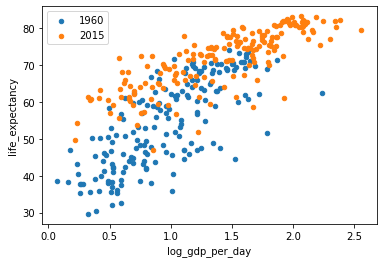

In [112]:
gapminder_by_year = gapminder.set_index('year').sort_index()
gapminder_by_country = gapminder.set_index('country').sort_index()
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','life_expectancy', label = 1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day','life_expectancy', label = 2015, color='C1', ax=axes)

<AxesSubplot:xlabel='log_gdp_per_day', ylabel='age5_surviving'>

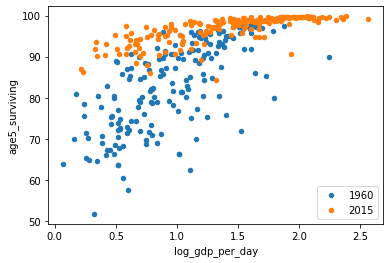

In [113]:
axes = gapminder_by_year.loc[1960].plot.scatter('log_gdp_per_day','age5_surviving', label = 1960)
gapminder_by_year.loc[2015].plot.scatter('log_gdp_per_day','age5_surviving', label = 2015, color='C1', ax=axes)

<AxesSubplot:xlabel='year'>

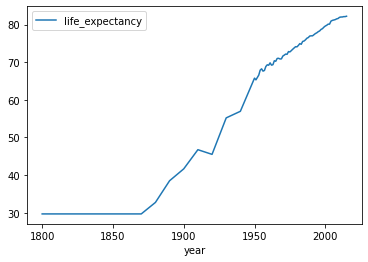

In [114]:
gapminder_by_country.loc['Italy'].sort_values('year').plot('year','life_expectancy')

<AxesSubplot:xlabel='year'>

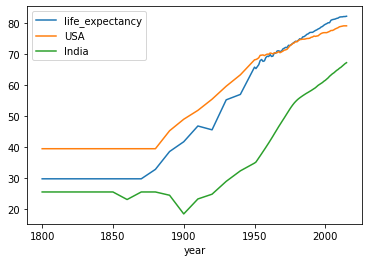

In [115]:
axes = gapminder_by_country.loc['Italy'].sort_values('year').plot('year','life_expectancy')
gapminder_by_country.loc['United States'].sort_values('year').plot('year','life_expectancy',label='USA',ax=axes,color='C1')
gapminder_by_country.loc['India'].sort_values('year').plot('year','life_expectancy',label='India',ax=axes,color='C2')

In [119]:
zipfile.ZipFile('names.zip').extractall('.')

In [120]:
ls

Analyzing weather data using NumPy.ipynb
DENVER.dly
Data Structures in Python.ipynb
HILO.dly
Intro to pandas.ipynb
JupyterNotes.ipynb
MINNEAPOLIS.dly
NEW YORK.dly
NumPy introduction.ipynb
SAN DIEGO.dly
Wordplay Anagrams Palindromes.ipynb
__pycache__/
discography.npy*
gapminder.csv*
getweather.py*
monalisa.npy*
monalisa.txt*
names/
names.zip*
nobels.csv*
pasadena.dly
random_arr.txt
random_mat.npy
readme.txt
stations.txt
words.txt*


In [121]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [122]:
pd.read_csv('names/yob2011.txt', names=['name','sex','number'])

,name,sex,number
0,Sophia,F,21842
1,Isabella,F,19910
2,Emma,F,18803
3,Olivia,F,17322
4,Ava,F,15503
...,...,...,...
33903,Zylar,M,5
33904,Zylas,M,5
33905,Zyran,M,5
33906,Zyshawn,M,5


Load all years and add a column that identifies the year

In [128]:
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt', names=['name','sex','number']).assign(year=year)
                    for year in range(1880,2019))
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [129]:
allyears.describe()

,number,year
count,1.957046e+06,1.957046e+06
mean,1.796856e+02,1.975563e+03
std,1.522804e+03,3.419121e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.952000e+03
50%,1.200000e+01,1.985000e+03
75%,3.200000e+01,2.004000e+03
max,9.968900e+04,2.018000e+03


In [130]:
allyears.to_csv('allyears.csv.gz', index=False)

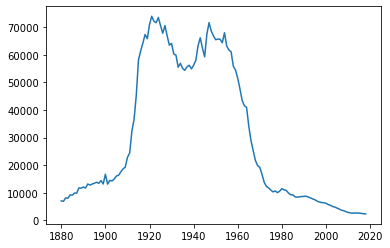

In [132]:
allyears_index = allyears.set_index(['sex','name','year']).sort_index()
pp.plot(allyears_index.loc[('F','Mary')])

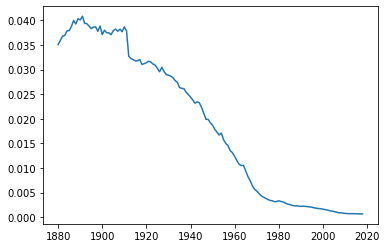

In [133]:
pp.plot((allyears_index.loc[('F','Mary')])/allyears.groupby('year').sum())

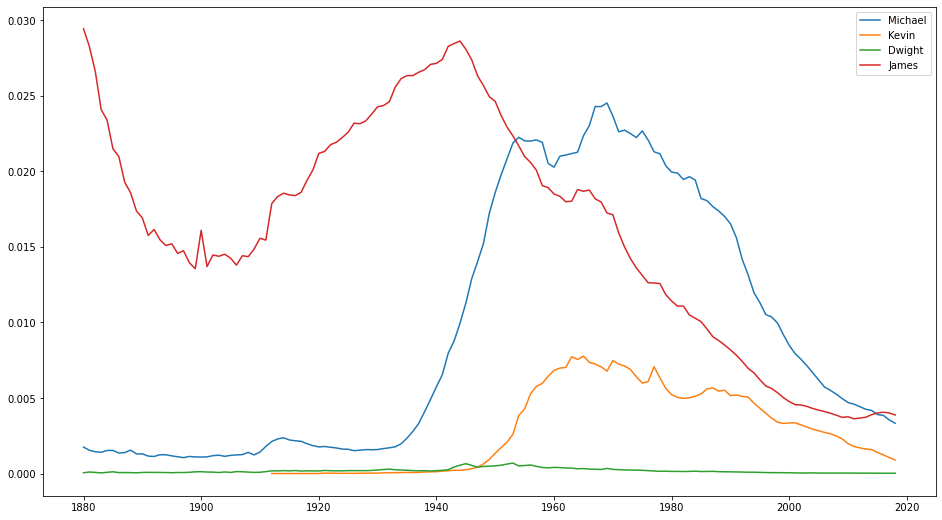

In [139]:
def plotname(sex, name):
    pp.plot((allyears_index.loc[(sex,name)])/allyears.groupby('year').sum(), label=name)
    
def comparenames(sex, names):
    pp.figure(figsize = (16,9))
    for name in names:
        plotname(sex, name)
    pp.legend()

comparenames('M',['Michael','Kevin','Dwight','James'])

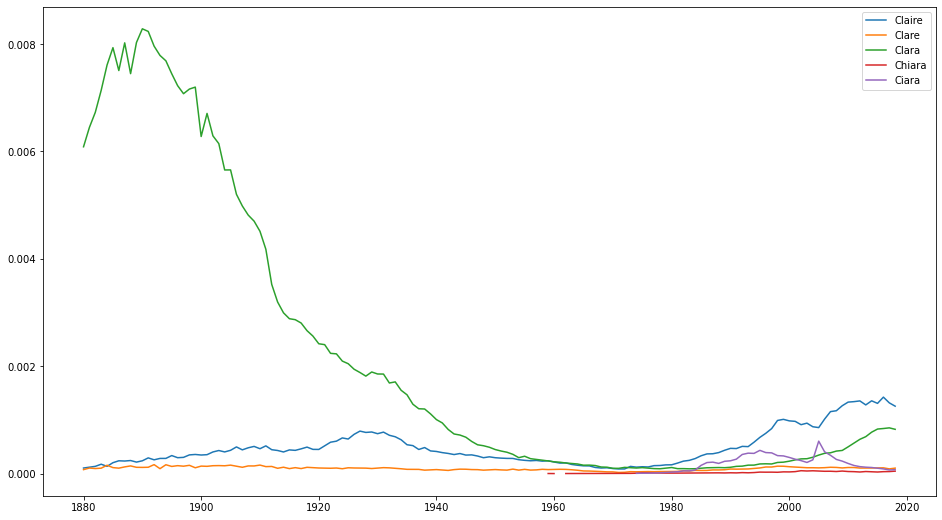

In [140]:
claires = ['Claire','Clare','Clara','Chiara','Ciara']
comparenames('F',claires)

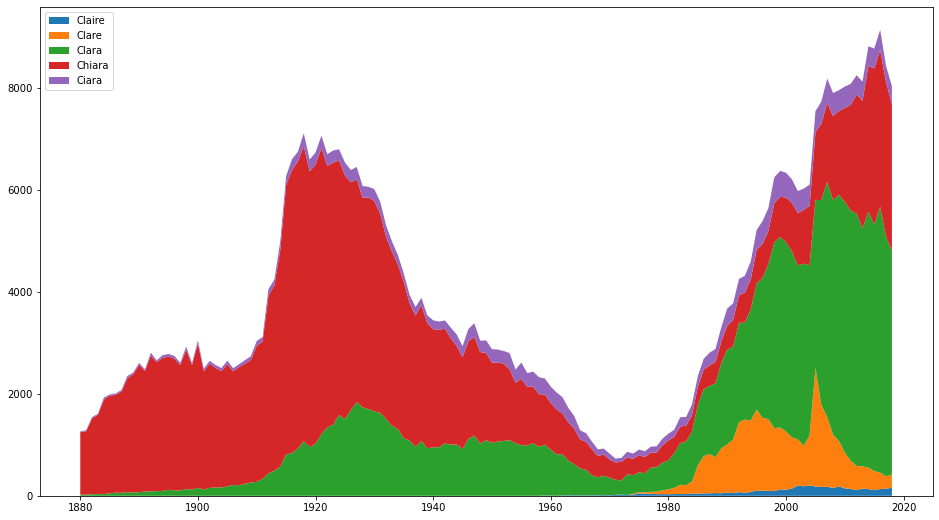

In [149]:
pp.figure(figsize=(16,9))

pp.stackplot(range(1880,2019),allyears_index.loc[('F',claires),:].unstack(level=2).fillna(0),labels=claires)
pp.legend(loc = 'upper left')

Finding top ten names by year

In [165]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

In [166]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                   
F   2018       Emma   18688
    2018     Olivia   17921
    2018        Ava   14924
    2018   Isabella   14464
    2018     Sophia   13928
    2018  Charlotte   12940
    2018        Mia   12642
    2018     Amelia   12301
    2018     Harper   10582
    2018     Evelyn   10376

In [168]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10).reset_index().name

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [180]:
def getyear(sex, year):
    return allyears_byyear.loc[sex,year].sort_values('number', ascending=False).head(10).reset_index().name

In [181]:
pd.DataFrame({year: getyear('F', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


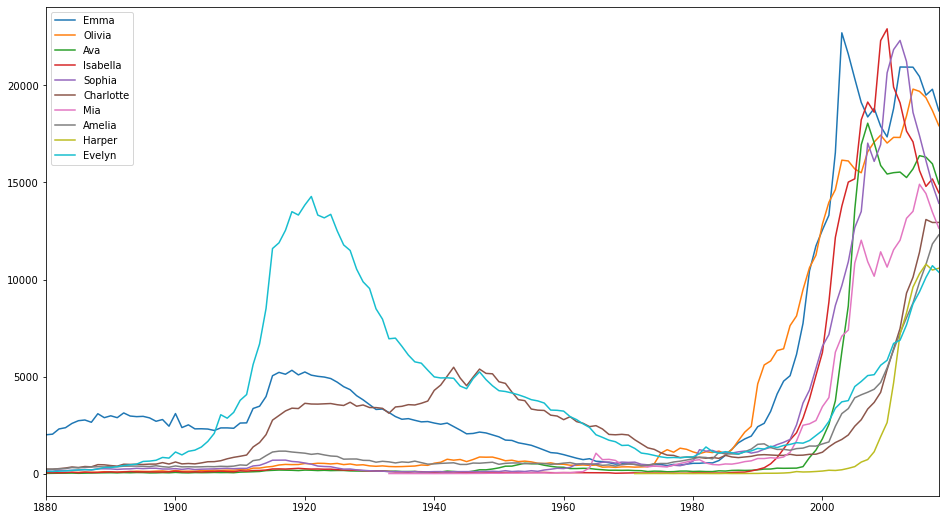

In [187]:
def plotname(sex, name):
    data = allyears.query('@sex == sex and @name == name')
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin = 1880, xmax= 2018)
    
pp.figure(figsize=(16,9))
for name in getyear('F', 2018):
    plotname('F', name)
    
pp.legend()

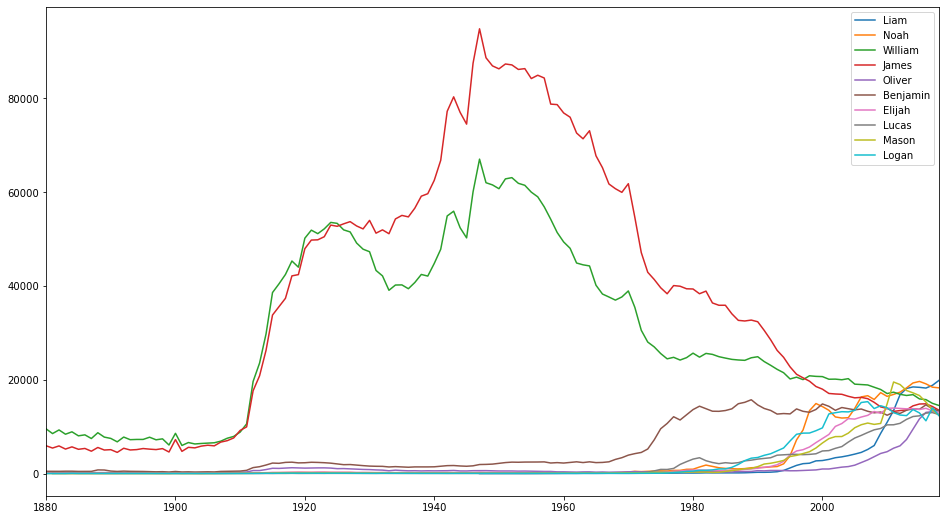

In [188]:
pp.figure(figsize=(16,9))
for name in getyear('M', 2018):
    plotname('M', name)
    
pp.legend()

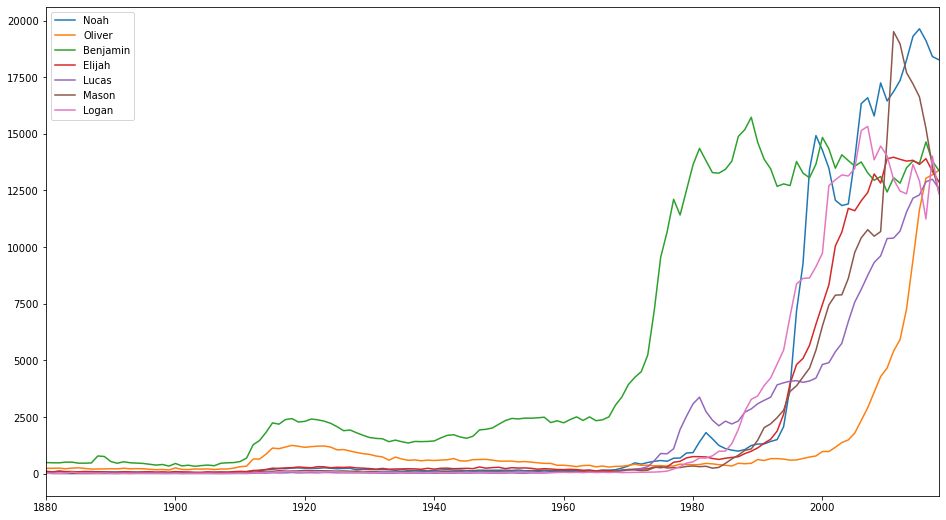

In [190]:
pp.figure(figsize=(16,9))
for name in ['Noah','Oliver','Benjamin','Elijah','Lucas','Mason','Logan']:
    plotname('M', name)
    
pp.legend()

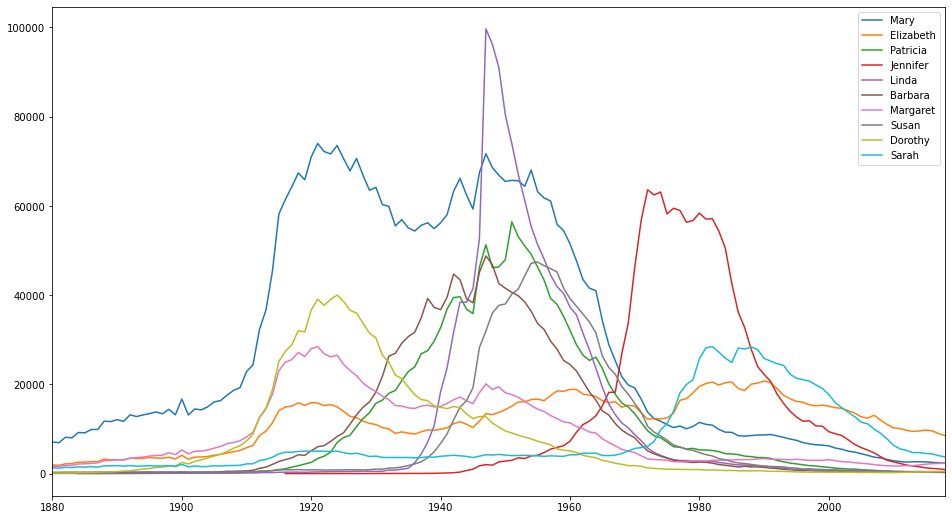

In [194]:
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number',ascending=False).head(10)
pp.figure(figsize=(16,9))

for name in alltime_f.index:
    plotname('F',name)
    
pp.legend()

**CHALLENGE**
* find top 10 unisex names

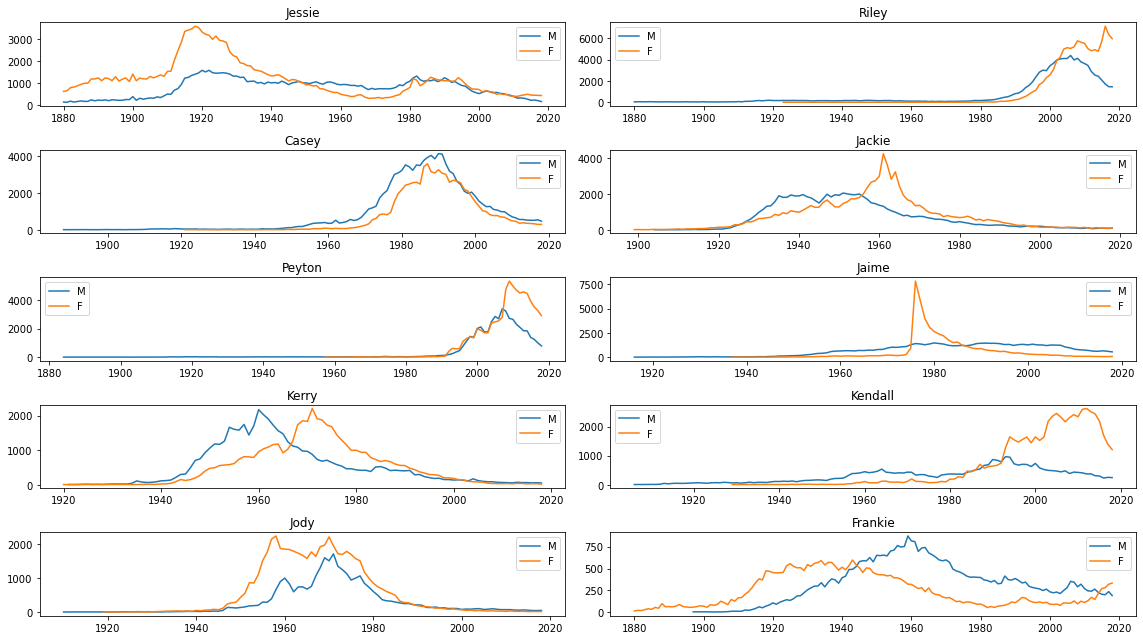

In [224]:
grouped = allyears.groupby(['sex','name']).number.sum()
females = grouped.loc['F']
males = grouped.loc['M']

ratios = (grouped.loc['M']/ grouped.loc['F'])
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

common = (males.loc[unisex]+females.loc[unisex]).sort_values(ascending=False).head(10)
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()


pp.figure(figsize=(16,9))

for i,name  in enumerate(common.index):
    pp.subplot(5,2,i+1)
    pp.plot(allyears_indexed.loc['M',name],label='M')
    pp.plot(allyears_indexed.loc['F',name],label='F')
    pp.legend()
    pp.title(name)
    
pp.tight_layout()